In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

__DESKRIPSI PROYEK:__
<br>Anda bekerja sebagai analis untuk operator telekomunikasi Megaline. Perusahaan tersebut menawarkan kliennya dua paket prabayar, Surf dan Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan untuk menyesuaikan anggaran iklan.
Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda akan memiliki 500 data klien Megaline: siapa mereka, dari mana mereka, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku klien dan menentukan paket prabayar mana yang mendatangkan lebih banyak pendapatan.

__TUJUAN PROYEK:__
<br>Analisa perilaku customers/clients dari data operator telekomunikasi Megaline, untuk menentukan dari dua paket prabayar (Surf dan Ultimate) mana yang lebih menguntungkan dan menguji dua hipotesis statistik. 

__Langkah-langkah mengerjakan proyek:__
1. Buka file data dan pelajari informasi umumnya
    <br>File path:
    *  /datasets/megaline_calls.csv 
       <li>/datasets/megaline_internet.csv 
       <li>/datasets/megaline_messages.csv 
       <li>/datasets/megaline_plans.csv 
       <li>/datasets/megaline_users.csv 
2. Siapkan datanya
*  Konversikan data menjadi tipe data yang dibutuhkan
<li>Temukan dan eliminasi kesalahan pada data
<li>Jelaskan kesalahan yang Anda temukan dan bagaimana Anda mengeliminasinya. Catatan: terdapat sejumlah panggilan yang memiliki durasi 0,0 menit. Ini mungkin adalah panggilan tak terjawab. Terserah Anda apakah Anda akan melakukan eliminasi untuk nilai-nilai ini atau tidak; pertimbangkanlah seberapa besar ketidakhadiran mereka akan memengaruhi hasil analisis Anda.
<br>Untuk setiap pengguna, temukan:
<li>Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan
<li>Jumlah SMS yang dikirim per bulan
<li>Volume data per bulan
<li>Pendapatan bulanan dari setiap pengguna (kurangi batas paket gratis dari jumlah total panggilan, SMS, dan data; kalikan hasilnya dengan nilai paket telepon; tambahkan biaya bulanan tergantung pada paket teleponnya)
3. Analisis datanya
<br>Deskripsikan perilaku konsumen. Temukan menit, pesan, dan volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan. Hitung rata-rata, varians, dan standar deviasinya. Buatlah histogram. Deskripsikan distribusinya.
4. Uji hipotesisnya
*  Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
<li>Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.
<br>Anda dapat menentukan seberapa besar nilai "alpha" yang akan digunakan.
<br>Jelaskan:
*  Bagaimana Anda merumuskan hipotesis nol dan hipotesis alternatif.
<li>Kriteria apa yang Anda gunakan untuk menguji hipotesis dan alasan penggunaannya.
5. Tulis kesimpulannya secara menyeluruh
<br>Format: Selesaikan tugas Anda di Jupyter Notebook. Masukkan kode pemrograman ke dalam sel code dan teks penjelasan ke dalam sel markdown, kemudian lakukan pemformatan dan beri judul.


__DESKRIPSI DATA__
<br>Ingat! Megaline membulatkan detik ke menit, serta megabita ke gigabita. Untuk panggilan, setiap panggilan individual dibulatkan ke atas: bahkan jika suatu panggilan berlangsung hanya satu detik, ia akan dihitung sebagai satu menit. Untuk lalu lintas web, setiap sesi web individual tidak dibulatkan ke atas. Akan tetapi, total untuk sebulan dibulatkan ke atas. Jika seorang pengguna menghabiskan 1025 megabita bulan ini, maka ia akan dikenai biaya untuk 2 gigabita.


__Tabel users (data pengguna):__

<li>user_id — ID pengguna
<li>first_name — nama depan pengguna
<li>last_name — nama belakang pengguna
<li>age — usia pengguna (tahun)
<li>reg_date — tanggal mulai berlangganan (dd, mm, yy)
<li>churn_date — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak @ada, berarti paket layanan sedang digunakan saat data ini dibuat)
<li>city — kota tempat tinggal pengguna
<li>plan — nama paket telepon

<br>__Tabel calls (data panggilan):__
<li>id — ID sesi web unik
<li>call_date — tanggal panggilan
<li>duration — durasi panggilan (dalam menit)
<li>user_id — ID pengguna yang melakukan panggilan

<br>__Tabel messages (data SMS):__
<li>id — ID SMS unik
<li>message_date — tanggal SMS dikirim
<li>user_id — ID pengguna yang mengirim SMS

<br>__Tabel internet (data sesi web):__
<li>id — ID sesi web unik
<li>mb_used — volume data yang dihabiskan selama sesi (dalam megabita)
<li>session_date — tanggal sesi web
<li>user_id — ID pengguna

<br>__Tabel plans (data paket telepon):__
<li>plan_name — nama paket telepon
<li>usd_monthly_fee — biaya bulanan dalam dolar AS
<li>minutes_included — alokasi menit panggilan bulanan
<li>messages_included — alokasi SMS bulanan
<li>mb_per_month_included — alokasi volume data bulanan (dalam megabita)
<li>usd_per_minute — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
<li>usd_per_message — harga per SMS jika telah melebihi batas alokasi paket
<li>usd_per_gb — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

In [2]:
df_calls=pd.read_csv('/datasets/megaline_calls.csv')
df_internet=pd.read_csv('/datasets/megaline_internet.csv')
df_messages=pd.read_csv('/datasets/megaline_messages.csv') 
df_plans=pd.read_csv('/datasets/megaline_plans.csv')
df_users=pd.read_csv('/datasets/megaline_users.csv')

__DF_USERS__

In [3]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Banyak missing values di column 'churn_date' berarti paket layanan sedang digunakan saat data ini dibuat, artinya missing values pada column ini bersifat positif bagi Megaline. Nilai yang hilang ini harus diperiksa dan NaN akan diganti dengan nama kategori tertentu pada kolom tambahan baru. 

In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


<li>Missing values hanya terdapat pada column 'churn_date' saja
<li>dtype pada column reg_date perlu dirubah menjadi to_datetime untuk mempermudah analisa (jika diperlukan) dibedakan berdasarkan hitungan days, months atau years. 

Ada 466 rows missing values pada column churn_date. Perlu dibersihkan missing values ini. 

In [5]:
df_users.churn_date.value_counts()

2018-12-18    3
2018-11-14    2
2018-12-19    2
2018-12-31    2
2018-12-12    1
2018-12-10    1
2018-12-15    1
2018-09-17    1
2018-09-18    1
2018-11-18    1
2018-12-26    1
2018-09-07    1
2018-11-16    1
2018-11-24    1
2018-11-30    1
2018-10-03    1
2018-11-29    1
2018-12-27    1
2018-10-07    1
2018-12-22    1
2018-08-19    1
2018-07-31    1
2018-08-16    1
2018-11-11    1
2018-12-30    1
2018-11-21    1
2018-10-13    1
2018-10-22    1
2018-09-01    1
Name: churn_date, dtype: int64

<li>customer yang berhenti berlangganan sepertinya hanya di bulan 7 sd 12 tahun 2018. Sepertinya ini data tahun 2018 saja. Jadi untuk memudahkan analisa, kategorisasi NaN untuk churn_date bisa diganti dengan 2018-12-31.
<li>Ternyata dtype column churn_date ini masih int64 sehingga pada langkah berikutnya perlu dirubah menjadi to_datetime sama seperti column reg_date.

In [6]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


nilai mean dan median hampir satu garis, kemungkinan outliers hampir tidak ada pengaruh 

<AxesSubplot:>

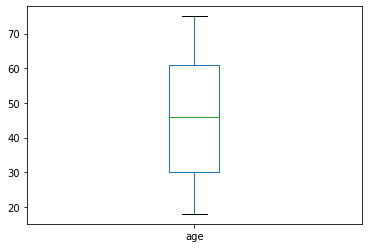

In [7]:
df_users.age.plot(kind='box')

Terlihat tidak ada outliers

__DF_CALLS__

In [8]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [9]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


<li>Total column ada 4 columns dan memiliki 137735 rows. 
<li>Tidak ada missing values dari setiap kolom. 
<li>Untuk dtype di column 'call_date' perlu dirubah to_datetime, sehingga dapat memudahkan (jika diperlukan) untuk menghitung day, month atau year. 

In [10]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Min value pada column duration adalah 0 (sesuai dengan info pada instruksi) berarti ada panggilan tidak terjawab, sehingga tidak perlu dikenakan biaya untuk nilai 0 ini. Ada 478 user_id yang mengalami panggilan tidak terjawab alias duration yang nilainya 0 menit.

In [11]:
df_calls[(df_calls['duration']==0)]['user_id'].value_counts(ascending=True)

1306      1
1323      1
1104      1
1481      1
1135      2
       ... 
1334    224
1362    224
1240    228
1324    236
1077    249
Name: user_id, Length: 478, dtype: int64

In [12]:
df_calls.loc[df_calls['duration']==0]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


__DF_MESSAGES__

In [13]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [14]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


<li>tidak ada missing values pada 3 columns 
<li>dtype message_date perlu dirubah ke to_datetime. 
<li>dytpe id dapat menyulitkan analisa ke depan karena string. Jika diperlukan akan dirubah menjadi interger.

In [15]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


nilai max user_id adalah 1497 berarti ada 2 users yang tidak mengirimkan SMS.

__DF_INTERNET__

In [16]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<li>ada nilai null pada mb_used artinya ada user yang tidak ada volume data selama sesi
<li>nilai mb_used sesuai instruksi harus dibulatkan ke atas dengan satuan GB

In [17]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


<li>tidak ada missing values pada 4 columns yang ada
<li>dtypes id (mungkin) akan dirubah menjadi integer untuk memudahkan perhitungan
<li>dtypes session_date akan dirubah menjadi to_datetime agar dapat dilihat days, months dan years.  

In [18]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


<AxesSubplot:>

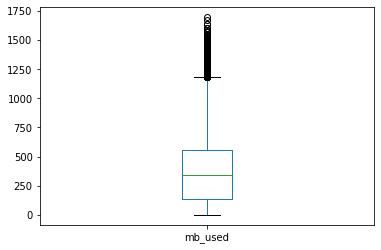

In [19]:
df_internet.mb_used.plot(kind='box')

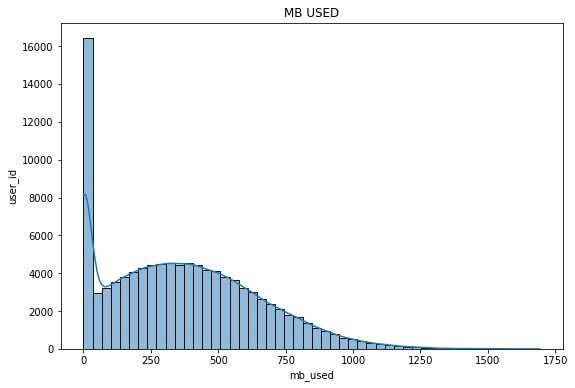

In [20]:
plt.figure(figsize=(9,6))
sns.histplot(df_internet['mb_used'], bins=50, kde=True)
plt.xlabel('mb_used')
plt.ylabel('user_id')
plt.title('MB USED')
plt.show()

In [21]:
df_internet.mb_used.value_counts()

0.00      13747
414.46        8
435.77        8
423.06        7
313.79        7
          ...  
301.21        1
108.62        1
608.63        1
212.02        1
677.66        1
Name: mb_used, Length: 57624, dtype: int64

In [22]:
df_internet.loc[df_internet['mb_used']>554.61].value_counts()

id        user_id  session_date  mb_used
1000_379  1000     2018-12-28    660.40     1
1327_56   1327     2018-12-18    1141.08    1
1327_77   1327     2018-09-10    609.36     1
1327_76   1327     2018-10-05    786.76     1
1327_72   1327     2018-11-20    1332.18    1
                                           ..
1156_153  1156     2018-07-16    688.97     1
1156_151  1156     2018-12-04    780.87     1
1156_144  1156     2018-04-28    726.68     1
1156_143  1156     2018-06-06    637.51     1
1499_91   1499     2018-09-29    558.03     1
Length: 26205, dtype: int64

<li>nilai mean dan median hanya berbeda 22.8MB artinya outliers tidak significant. Hal ini dapat terjadi walaupun jumlah outliers ada sekitar 25% namun jumlah users yang tidak menggunakan (dihabiskan) volume data selama sesi cukup banyak yaitu 13747 baris data.

__DF_PLANS__

In [23]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [24]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


Tidak ada missing values dan tidak ada masalah dengan data ini. 

__PROCESSING__

__MERUBAH OBJECT TO_DATETIME__

In [25]:
for df in [df_users, df_messages, df_calls, df_internet]:
    for col in ['reg_date','churn_date','message_date','call_date','session_date']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col])

In [26]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [27]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [28]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [29]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


semua dtypes object data date telah dirubah dari string menjadi to_datetime

__MISSING_VALUES__

In [30]:
df_users.churn_date = df_users.churn_date.fillna('2018-12-31')

In [31]:
df_users.churn_date = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [32]:
df_users.churn_date.count()

500

missing values pada kolom churn_date sudah teratasi

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Mengisi nilai hilang `churn_date` dengan tanggal terakhir bisa diterima.
</div>

__MENGHILANGKAN DUPLIKAT (JIKA ADA)__

In [33]:
result = []
for df in [df_users, df_messages, df_calls, df_internet]:
    print(result.append(df.duplicated().sum()))

None
None
None
None


tidak ada duplikat data

__MEMBULATKAN DETIK KE MENIT__

In [34]:
df_calls['duration_up'] = df_calls['duration'].apply(np.ceil).astype(int)

In [35]:
df_calls.head()

,id,user_id,call_date,duration,duration_up
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


In [36]:
df_calls.loc[df_calls['duration_up']==0]

,id,user_id,call_date,duration,duration_up
19,1001_4,1001,2018-12-05,0.0,0
25,1001_13,1001,2018-12-24,0.0,0
31,1001_30,1001,2018-10-17,0.0,0
32,1001_31,1001,2018-11-03,0.0,0
34,1001_35,1001,2018-12-21,0.0,0
...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0,0
137715,1499_184,1499,2018-09-15,0.0,0
137720,1499_189,1499,2018-12-27,0.0,0
137722,1499_191,1499,2018-12-24,0.0,0


__MEMBULATKAN MB MENJADI GB__

In [37]:
df_internet['gb_used']=np.ceil((df_internet['mb_used'].values)/1024).astype(int)

In [38]:
df_internet.loc[df_internet['mb_used']>1024]

,id,user_id,session_date,mb_used,gb_used
17,1001_29,1001,2018-10-09,1067.99,2
81,1001_151,1001,2018-10-19,1123.93,2
108,1001_199,1001,2018-12-18,1119.44,2
112,1001_210,1001,2018-09-19,1174.73,2
125,1001_228,1001,2018-11-09,1049.78,2
...,...,...,...,...,...
104354,1498_427,1498,2018-10-18,1068.56,2
104676,1499_71,1499,2018-10-16,1039.08,2
104695,1499_90,1499,2018-12-22,1444.97,2
104733,1499_128,1499,2018-11-18,1232.86,2


kolom date dari semua data terlihat acak karena user_id belum dikelompokkan. Pengelompokkan data akan mempermudah analisa. 

__PENGELOMPOKKAN DATA DF_CALLS__

__CALLS per Month (Jumlah panggilan yang dilakukan dan menit yang digunakan per bulan)__

In [39]:
df_calls.loc[df_calls['user_id']==1000]

,id,user_id,call_date,duration,duration_up
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5
5,1000_388,1000,2018-12-31,2.20,3
6,1000_510,1000,2018-12-27,5.75,6
7,1000_521,1000,2018-12-28,14.18,15
8,1000_530,1000,2018-12-28,5.77,6
9,1000_544,1000,2018-12-26,4.40,5


In [40]:
df_calls.loc[df_calls['user_id']==1000]['duration_up'].sum()

124

Contoh untuk user_id 1000 selama bulan desember 2018 ada total durasi panggilan 124 menit. Tabel data baru perlu dibuat dimana ada column user_id (dikelompokkan), month (extract dari column call_date) dan total pemakaian per bulan. Tapi pertama-tama column call_date dipecah menjadi month supaya mempermudah analisa data. 

In [41]:
df_calls['month']=df_calls['call_date'].dt.month 

In [42]:
df_calls.tail()

,id,user_id,call_date,duration,duration_up,month
137730,1499_199,1499,2018-11-21,8.72,9,11
137731,1499_200,1499,2018-10-20,10.89,11,10
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,1,10
137734,1499_203,1499,2018-12-29,13.86,14,12


In [43]:
calls_monthly=df_calls.pivot_table(index=['user_id','month'],values='duration_up',aggfunc='sum')
calls_monthly=calls_monthly.reset_index()
calls_monthly.columns=['user_id','month','total_duration']

In [44]:
calls_monthly.head()

,user_id,month,total_duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


jumlah panggilan yang dilakukan:

In [45]:
calls_made_monthly = (df_calls.groupby(['user_id', 'month'])
                   .agg({'id': 'count'}).rename(columns={'id': 'calls_made'})
                  )

In [46]:
calls_made_monthly.head()

calls_made
user_id month            
1000    12             16
1001    8              27
        9              49
        10             65
        11             64

In [47]:
calls_monthly=(calls_made_monthly
               .merge(calls_monthly,how='left',on=['user_id','month'])
              )

In [48]:
calls_monthly.head()

,user_id,month,calls_made,total_duration
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426


__MESSAGES per Month (Jumlah SMS yang dikirim per bulan)__

seperti pada tabel df_calls, juga dibuat tabel baru dengan colum total message berdasarkan user_id

In [49]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [50]:
df_messages['month']=df_messages['message_date'].dt.month 

In [51]:
messages_monthly=df_messages.pivot_table(index=['user_id','month'],values='id',aggfunc='count')
messages_monthly=messages_monthly.reset_index()
messages_monthly.columns=['user_id','month','total_message']

In [52]:
messages_monthly.head()

,user_id,month,total_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


__INTERNET per Month (VOLUME DATA PER BULAN)__ 

hal yang sama pada df_internet perlu dikelompokkan dan dibuat colum total dari gb_used, nama barunya total_gb_monthly. Tentunya total_gb_monthly ini bergantung pada total_mb_monthly.

In [53]:
df_internet.tail()

,id,user_id,session_date,mb_used,gb_used
104820,1499_215,1499,2018-10-20,218.06,1
104821,1499_216,1499,2018-12-30,304.72,1
104822,1499_217,1499,2018-09-22,292.75,1
104823,1499_218,1499,2018-12-07,0.00,0
104824,1499_219,1499,2018-12-24,758.31,1


In [54]:
df_internet['month']=df_internet['session_date'].dt.month

In [55]:
internet_monthly=df_internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')
internet_monthly=internet_monthly.reset_index()
internet_monthly.columns=['user_id','month','total_mb_monthly']
internet_monthly['total_gb_monthly']=np.ceil((internet_monthly['total_mb_monthly'].values)/1024).astype(int)

In [56]:
internet_monthly.head()

,user_id,month,total_mb_monthly,total_gb_monthly
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19


In [57]:
#Tapi dengan nilai pembagi 1024 maka ada total_gb_monthly yang tidak dibulatkan ke atas #seperti user_id 1001 pada bulan Oktober dimana hasilnya tetap 22GB. Untuk hal ini, sy #bulatkan pembagi menjadi 1000. 

In [58]:
#internet_monthly['total_gb_monthly']=(np.ceil
                                      #((internet_monthly['total_mb_monthly']
                                        #.values)/1000).astype(int)
                                     #)

<div class="alert alert-block alert-info">
<b> 1GB = 1024MB DONE! <a class="tocSkip"></a>
</div>

In [59]:
internet_monthly

,user_id,month,total_mb_monthly,total_gb_monthly
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


__Pendapatan bulanan dari setiap pengguna (kurangi batas paket gratis dari jumlah total panggilan, SMS, dan data; kalikan hasilnya dengan nilai paket telepon; tambahkan biaya bulanan tergantung pada paket teleponnya)__

untuk hal ini, supaya lebih mudah dibaca dalam 1 data besar maka digabungkan saja semua data per bulan (calls_monthly, messages_monthly dan internet_monthly). Juga perlu dimasukkan kolom plan dan city pada tabel df_users untuk dapat melihat program paket mana yang diambil oleh users

In [60]:
user_plan=df_users[['user_id','plan','city']]
user_plan=user_plan.merge(df_plans,left_on='plan',right_on='plan_name')

In [61]:
df_monthly=(calls_monthly
            .merge(messages_monthly,how='outer',on=['user_id','month'])
            .merge(internet_monthly,how='outer',on=['user_id','month'])
            .merge(user_plan,on=('user_id'))
           )

In [62]:
df_monthly.head()

,user_id,month,calls_made,total_duration,total_message,total_mb_monthly,total_gb_monthly,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf


Dataframe baru dengan columns dan values yang diperlukan untuk menghitung pendapatan bulanan.
<br>Cek dulu missing values (jika ada).

In [63]:
df_monthly.isna().sum()

user_id                    0
month                      0
calls_made                35
total_duration            35
total_message            487
total_mb_monthly          16
total_gb_monthly          16
plan                       0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

ada beberapa missing values. Hal ini diduga karena:
1. ada beberapa panggilan tidak terjawab 
2. ada users yang hanya pakai internet tapi tidak calls dan tidak message(sms) atau sebaliknya
<br>Untuk hal ini maka dihapus saja missing values dan diganti dengan memberi nilai 0, karena tidak ada data pendukung untuk mengisi missing values ini dengan nilai tertentu. 

In [64]:
for col in [
            'calls_made','total_duration',
            'total_message','total_mb_monthly','total_gb_monthly'
            ]:
    df_monthly[col]=df_monthly[col].fillna(0)

In [65]:
df_monthly.isna().sum()

user_id                  0
month                    0
calls_made               0
total_duration           0
total_message            0
total_mb_monthly         0
total_gb_monthly         0
plan                     0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

DONE!

Sekarang bisa dilakukan perhitungan pendapatan bulanan!

instruksi: 
<br>kurangi batas paket gratis dari jumlah total panggilan, SMS, dan data; kalikan hasilnya dengan nilai paket telepon; tambahkan biaya bulanan tergantung pada paket teleponnya)

karena variable pengali (nilai paket telepon) hanya ada messages_included, mb_per_month_included dan minutes_included maka yang dipakai bukan values dari column calls_made melainkan dari total_duration.

untuk column 'mb_per_month_included' perlu dirubah menjadi GB terlebih dahulu

In [66]:
df_monthly['gb_per_month_included']=np.ceil((df_monthly['mb_per_month_included'].values)/1024)
                                            

<div class="alert alert-block alert-info">
<b>OK DONE! 1GB=1024MB <a class="tocSkip"></a>
</div>

In [67]:
df_monthly.head()

,user_id,month,calls_made,total_duration,total_message,total_mb_monthly,total_gb_monthly,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0


In [68]:
df_monthly['calls_revenue']=df_monthly.apply(lambda x: max(x['total_duration']-x['minutes_included'],0)
                                            *x['usd_per_minute'],axis=1)
df_monthly['messages_revenue']=df_monthly.apply(lambda x: max(x['total_message']-x['messages_included'],0)
                                               *x['usd_per_message'],axis=1)
df_monthly['volume_gb_revenue']=df_monthly.apply(lambda x: max(x['total_gb_monthly']-x['gb_per_month_included'],0)
                                                 *x['usd_per_gb'],axis=1)
df_monthly['total_revenue']=df_monthly['calls_revenue']+df_monthly['messages_revenue']+df_monthly['volume_gb_revenue']+df_monthly['usd_monthly_pay']


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Seharusnya jika `total` kurang dari `included` maka `revenue = 0`, bukan negatif ya. Misalnya
    
    df_monthly['calls_revenue']=df_monthly.apply(lambda x: max(x['total_duration']-x['minutes_included'], 0)
                                            *x['usd_per_minute'],axis=1)
    
Bisa diperbaiki juga untuk `messages` dan `volume_gb`.
</div>

<div class="alert alert-block alert-info">
<b>DONE! 
<br>Code sudah ditambahan 'max' dan '0' agar revenue tidak negatif. <a class="tocSkip"></a>
</div>

In [69]:
df_monthly.head()

,user_id,month,calls_made,total_duration,total_message,total_mb_monthly,total_gb_monthly,plan,city,messages_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,calls_revenue,messages_revenue,volume_gb_revenue,total_revenue
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0,70.00
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,surf,15.0,0.0,0.09,70.0,90.09
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,...,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00


supaya total revenue per bulan terlihat lebih jelas, dilihat dari grafik untuk kedua plan yaitu surf dan ultimate

In [70]:
total_profit_month_plan = df_monthly.groupby(['plan','month']
                                            )['total_revenue'].sum().reset_index()

Text(0.5, 1.0, 'Total monthly profit for the "Surf" plan')

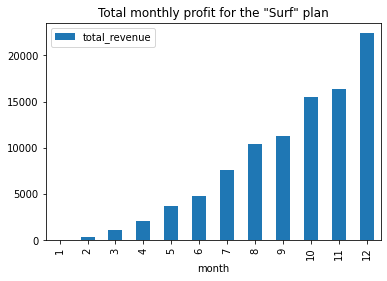

In [71]:
total_profit_month_plan[total_profit_month_plan['plan'] == 'surf'].plot(y='total_revenue', x='month', kind='bar')
plt.title('Total monthly profit for the "Surf" plan')


<li>keuntungan cukup tinggi dan mulai meningkat pada semester ke-2 tahun 2018, puncaknya di bulan Desember 2018.  
<li>keuntungan dari plan surf ini juga dapat dianalisa bahwa alokasi besaran untuk calls, messages dan volume data tidak besar (jika dibandingkan dengan plan ultimate). Hal ini (mungkin saja) menjadikan pemakaian customers melebihi batas alokasi besaran yang telah ditentukan, artinya income tambahan bagi perusahaan. 

Text(0.5, 1.0, 'Total monthly profit for the "Ultimate" plan')

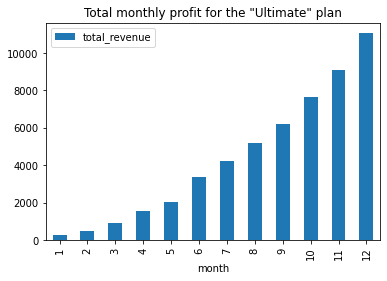

In [72]:
total_profit_month_plan[total_profit_month_plan['plan'] == 'ultimate'].plot(y='total_revenue', x='month', kind='bar')
plt.title('Total monthly profit for the "Ultimate" plan')

In [73]:
ultimate_1= df_monthly[['plan','total_duration']]

In [74]:
ultimate_1.loc[ultimate_1['plan']=='ultimate'].shape

(720, 2)

In [128]:
ultimate_1.loc[(ultimate_1['plan']=='ultimate') & (ultimate_1['total_duration']<3000)].count()

plan              720
total_duration    720
dtype: int64

<li>Keuntungan dari plan ultimate tidak sebesar plan surf namun memiliki pola yang mirip yaitu semakin meningkat mendekati akhir tahun.  
<li>Salah satu penyebab dari perbedaan keuntungan ini terkait dengan batasan paket yang diberikan. Terlihat untuk plan ultimate tidak ada users yang memakai fasilitas melebihi dari batas yang diberikan artinya tidak ada income tambahan bagi Megaline.
<li>plan ultimate ini harus dikaji ulang karena kurang cocok dengan customer's behavior selain juga customer's profile perlu dilihat ulang agar memberikan keuntungan optimal bagi perusahaan

__EDA__

Instruksi: 
<br>Deskripsikan perilaku konsumen. Temukan menit, pesan, dan volume penggunaan data seluler yang dibutuhkan pengguna setiap paket per bulan. Hitung rata-rata, varians, dan standar deviasinya. Buatlah histogram. Deskripsikan distribusinya.

<div class="alert alert-block alert-info">
<b> Menemukan menit (TOTAL DURATION) dengan mean, varians dan standard deviasi
</div>

SURF

In [76]:
df_surf= df_monthly[df_monthly['plan']=='surf']
df_ultimate=df_monthly[df_monthly['plan']=='ultimate']

Text(0, 0.5, 'frequency')

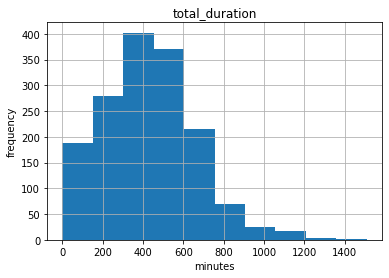

In [77]:
df_surf.hist('total_duration')
plt.xlabel('minutes')
plt.ylabel('frequency')

In [78]:
df_surf['total_duration'].describe()

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: total_duration, dtype: float64

In [79]:
print('average monthly calls length in minutes for plan "Surf":{:.0f}'.format(df_surf['total_duration'].mean()))
print('varians monthly calls length in minutes for plan "Surf":{:.0f}'.format(df_surf.var()['total_duration']))
print('standard deviation monthly calls length in minutes for plan "Surf":{:.0f}'.format(df_surf['total_duration'].std()))

average monthly calls length in minutes for plan "Surf":429
varians monthly calls length in minutes for plan "Surf":54968
standard deviation monthly calls length in minutes for plan "Surf":234


<AxesSubplot:>

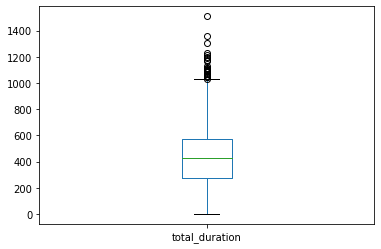

In [80]:
df_surf['total_duration'].plot(kind='box')

Nilai mean dapat dijadikan patokan karena nilai std tidak lebih besar dari mean, sedangkan varians adalah kuadrat dari std yang menunjukkan persebaran data atau banyaknya outliers (dapat terlihat pada boxplot). Dapat dilihat juga bahwa median dengan mean nilainya tidak berbeda significant hanya selisih 3 point (428 dan 425). 

ULTIMATE

Text(0, 0.5, 'frequency')

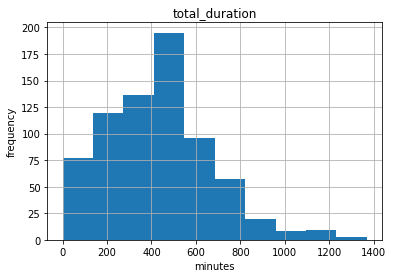

In [81]:
df_ultimate.hist('total_duration')
plt.xlabel('minutes')
plt.ylabel('frequency')

In [82]:
df_ultimate['total_duration'].describe()

count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: total_duration, dtype: float64

In [83]:
print('average monthly calls length in minutes for plan "Ultimate":{:.0f}'.format(df_ultimate['total_duration'].mean()))
print('varians monthly calls length in minutes for plan "Ultimate":{:.0f}'.format(df_ultimate.var()['total_duration']))
print('standard deviation monthly calls length in minutes for plan "Ultimate":{:.0f}'.format(df_ultimate['total_duration'].std()))

average monthly calls length in minutes for plan "Ultimate":430
varians monthly calls length in minutes for plan "Ultimate":57844
standard deviation monthly calls length in minutes for plan "Ultimate":241


<AxesSubplot:>

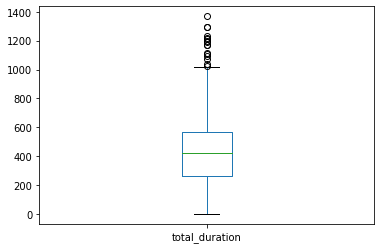

In [84]:
df_ultimate['total_duration'].plot(kind='box')

tidak berbeda jauh dari plan "Surf". Outliers dapat dikatakan tidak mengganggu distribusi data baik untuk surf maupun ultimate. Calls baik surf maupun ultimate berkisar di 424 sd 430 menit per bulan. 

Diketahui dari data plan di column "minutes_included" bahwa alokasi untuk plan surf adalah 500 menit dan 3000 menit pada plan ultimate. Dapat disimpulkan bahwa: 
<br>
<li>untuk customers plan surf pemakain cukup maksimal yaitu mendekati 500 menit per bulan. 
<li>sedangkan untuk customers plan ultimate terlihat penggunaan calls masih jauh dari alokasi calls per bulan yang tersedia. Sehingga ongkos biaya > pemakaian, tidak aneh untuk plan ultimate ini perusahaan mengalami kerugian cukup besar.   
<br>Mari lihat berapa banyak customers yang melakukan calls melebihi batas. 

In [85]:
print('SURF customers who are exceeded the limit:{:.0f}'.format(len(df_surf.query('total_duration>500'))))
print('Ratio SURF customers who are exceeded the limit:{:.0%}'.format(len(df_surf.query('total_duration>500'))
                                                                      /len(df_surf['total_duration'])))

SURF customers who are exceeded the limit:566
Ratio SURF customers who are exceeded the limit:36%


Srategi Megaline untuk customer plan SURF ini memang tepat, ada 36% customers yang memberikan profit tambahan untuk megaline. Sedangkan untuk plan Ultimate batasannya harus ditinjau ulang dengan target segmen yang tepat. 

<div class="alert alert-block alert-info">
<b> Menemukan pesan (MESSAGES) dengan mean, varians dan standard deviasi
</div>

SURF

Text(0, 0.5, 'frequency')

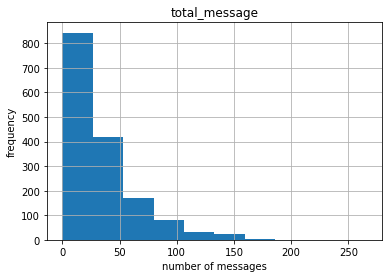

In [86]:
df_surf.hist('total_message')
plt.xlabel('number of messages')
plt.ylabel('frequency')

In [87]:
df_surf['total_message'].describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: total_message, dtype: float64

In [88]:
print('average monthly number of messages for plan "Surf":{:.0f}'.format(df_surf['total_message'].mean()))
print('varians monthly number of messages for plan "Surf":{:.0f}'.format(df_surf.var()['total_message']))
print('standard deviation monthly number of messages for plan "Surf":{:.0f}'.format(df_surf['total_message'].std()))

average monthly number of messages for plan "Surf":31
varians monthly number of messages for plan "Surf":1127
standard deviation monthly number of messages for plan "Surf":34


<AxesSubplot:>

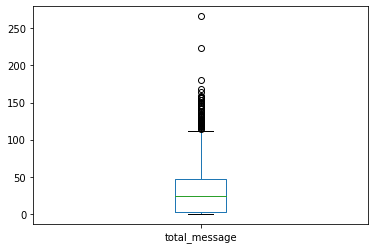

In [89]:
df_surf.total_message.plot(kind='box')

ULTIMATE

Text(0, 0.5, 'frequency')

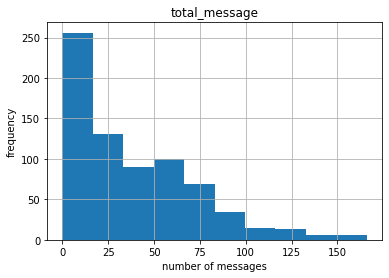

In [90]:
df_ultimate.hist('total_message')
plt.xlabel('number of messages')
plt.ylabel('frequency')

In [91]:
df_ultimate.total_message.describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: total_message, dtype: float64

In [92]:
print('average monthly number of messages for plan "Ultimate":{:.0f}'.format(df_ultimate['total_message'].mean()))
print('varians monthly number of messages for plan "Ultimate":{:.0f}'.format(df_ultimate.var()['total_message']))
print('standard deviation monthly number of messages for plan "Ultimate":{:.0f}'.format(df_ultimate['total_message'].std()))

average monthly number of messages for plan "Ultimate":38
varians monthly number of messages for plan "Ultimate":1209
standard deviation monthly number of messages for plan "Ultimate":35


<AxesSubplot:>

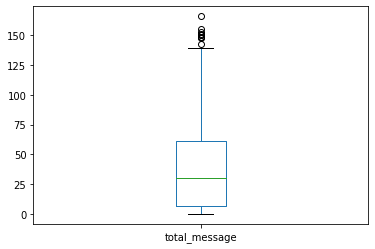

In [93]:
df_ultimate.total_message.plot(kind='box')

<li>kedua plan menunjukkan kemiringan grafik positif dimana nilai mean dengan std hampir sama (tidak beda jauh) artinya outliers tidak terlalu significant baik jumlah maupun besarannya. 
<li>dari kolom messages_included diketahui batas untuk plan surf adalah 50 messages per bulan sedangkan untuk plan ultimate adalah 1000 messages per bulan. Untuk customers plan surf dapat disimpulkan (lagi-lagi) penggunaan messages hanya mendekati batas paket yang tersedia (tidak ada charge tambahan). Sedangkan untuk customers plan ultimate sepertinya mereka juga tidak tertarik untuk mengirimkan message yang lebih banyak dari teman mereka di plan surf walaupun alokasi message yang tersedia sangat besar. Sepertinya plan ultimate ini tidak efektif menyasar segmen yang tepat. 

In [94]:
print('SURF customers who are exceeded the limit:{:.0f}'.format(len(df_surf.query('total_message>50'))))
print('Ratio SURF customers who are exceeded the limit:{:.0%}'.format(len(df_surf.query('total_message>50'))
                                                                      /len(df_surf['total_message'])))

SURF customers who are exceeded the limit:340
Ratio SURF customers who are exceeded the limit:22%


Profit tambahan sebesar 22% customers dari pengiriman pesan untuk plan Surf. Sedangkan plan Ultimate menambah production cost dan tidak memberi tambahan income Megaline. 

<div class="alert alert-block alert-info">
<b> Menemukan volume penggunaan data seluler dengan mean, variance dan standard deviasi
</div>

SURF

Text(0, 0.5, 'frequency')

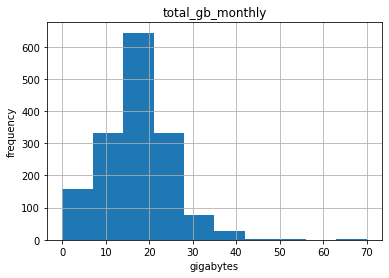

In [95]:
df_surf.hist('total_gb_monthly')
plt.xlabel('gigabytes')
plt.ylabel('frequency')

In [96]:
df_surf.total_gb_monthly.describe()

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: total_gb_monthly, dtype: float64

In [97]:
print('average monthly volume of data for plan "Surf":{:.0f}'.format(df_surf['total_gb_monthly'].mean()))
print('varians monthly volume of data for plan "Surf":{:.0f}'.format(df_surf.var()['total_gb_monthly']))
print('standard deviation monthly volume of data for plan "Surf":{:.0f}'.format(df_surf['total_gb_monthly'].std()))

average monthly volume of data for plan "Surf":17
varians monthly volume of data for plan "Surf":62
standard deviation monthly volume of data for plan "Surf":8


<AxesSubplot:>

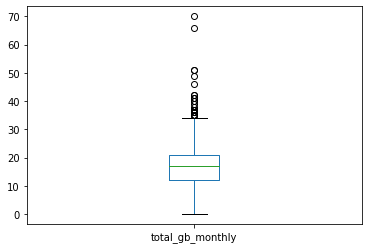

In [98]:
df_surf.total_gb_monthly.plot(kind='box')

ULTIMATE

Text(0, 0.5, 'frequency')

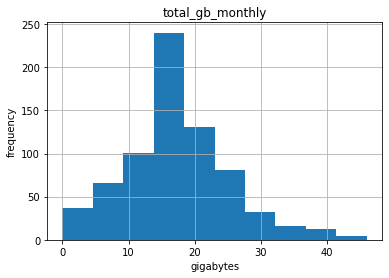

In [99]:
df_ultimate.hist('total_gb_monthly')
plt.xlabel('gigabytes')
plt.ylabel('frequency')

In [100]:
df_ultimate.total_gb_monthly.describe()

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: total_gb_monthly, dtype: float64

In [101]:
print('average monthly volume of data for plan "Ultimate":{:.0f}'.format(df_ultimate['total_gb_monthly'].mean()))
print('varians monthly volume of data for plan "Ultimate":{:.0f}'.format(df_ultimate.var()['total_gb_monthly']))
print('standard deviation monthly volume of data for plan "Ultimate":{:.0f}'.format(df_ultimate['total_gb_monthly'].std()))

average monthly volume of data for plan "Ultimate":17
varians monthly volume of data for plan "Ultimate":59
standard deviation monthly volume of data for plan "Ultimate":8


<AxesSubplot:>

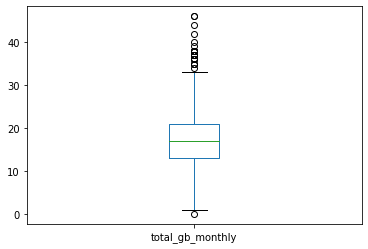

In [102]:
df_ultimate.total_gb_monthly.plot(kind='box')

<li>nilai outliers untuk kedua plan tidak berpengaruh significant terlihat dari nilai std yang jauh < nilai mean. 
<li>nilai mean dan median kedua plan bernilai sama yaitu 17 artinya distribusi data bersifat normal. 
<li>paket volume data untuk plan surf adalah 16GB per bulan sedangkan untuk plan ultimate adalah 31GB per bulan, sedangkan penggunaan volume data per bulan oleh customers kedua plan hanya 17GB per bulan artinya customers plan surf sudah melebihi dari batas quota yang tersedia (artinya alokasi volume data oleh perusahaan full efektif digunakan oleh customers sehingga ada charge tambahan) dan cusomters plan ultimate hanya memakai setengah dari volume data yang tersedia sehingga tidak memberikan revenue yang diharapkan oleh perusahaan. 

In [103]:
print('SURF customers who are exceeded the limit:{:.0f}'.format(len(df_surf.query('total_gb_monthly>16'))))
print('Ratio SURF customers who are exceeded the limit:{:.0%}'.format(len(df_surf.query('total_gb_monthly>16'))
                                                                      /len(df_surf['total_gb_monthly'])))

SURF customers who are exceeded the limit:832
Ratio SURF customers who are exceeded the limit:53%


Angka yang membuat Megaline semakin bersedia untuk memberikan bonus tambahan kepada karyawannya yang telah berjasa memberikan profit tambahan dari lebih dari 50% customers untuk penggunaan volume data ini. 

REMOVAL OUTLIERS FROM DATA: TOTAL DURATION, TOTAL MESSAGE and TOTAL GB Monthly

In [104]:
outlier_columns=['total_duration','total_message','total_gb_monthly']

In [105]:
def upper_lower_whisker(column):
    Q1  = df[column].quantile(0.25)
    Q3  = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    return lower_whisker, upper_whisker

#df_monthly = df.copy()

In [106]:
df_surf.name = "Surf"
df_ultimate.name = "Ultimate"
for df in [df_surf,df_ultimate]:
    print()
    print(df.name)
    for column in outlier_columns:
        print('start cleaning outlier on ', column)
        lower, upper = upper_lower_whisker(column)
        df_surf = df_surf[(df_surf[column] > lower) & (df_surf[column] < upper )]
        df_ultimate= df_ultimate[(df_ultimate[column] > lower) & (df_ultimate[column] < upper )]
        print('cleaning outlier on ', column, ' was finished!')


Surf
start cleaning outlier on  total_duration
cleaning outlier on  total_duration  was finished!
start cleaning outlier on  total_message
cleaning outlier on  total_message  was finished!
start cleaning outlier on  total_gb_monthly
cleaning outlier on  total_gb_monthly  was finished!

Ultimate
start cleaning outlier on  total_duration
cleaning outlier on  total_duration  was finished!
start cleaning outlier on  total_message
cleaning outlier on  total_message  was finished!
start cleaning outlier on  total_gb_monthly
cleaning outlier on  total_gb_monthly  was finished!


__PENGUJIAN HIPOTESIS__

1. Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.
2. Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.
3. Anda dapat menentukan seberapa besar nilai "alpha" yang akan digunakan.
<br>Jelaskan:
<li>Bagaimana Anda merumuskan hipotesis nol dan hipotesis alternatif.
<li>Kriteria apa yang Anda gunakan untuk menguji hipotesis dan alasan penggunaannya.


Untuk pengujian hipotesis ini perlu ditetap kan H0 (hipotesis nol) dan H1(alternative hypothesis - hal yang diharapkan) serta signifikansi statistik (ambang batas) yaitu alpha. 

<div class="alert alert-block alert-info">
<b> RATA-RATA PENDAPATAN DARI PENGGUNA PAKET TELEPON ULTIMATE dan SURF BERBEDA?
</div>

H0 = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf sama
<br>H1 = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda
<br>Alpha ditetapkan untuk pengujian hipotesis ini sebesar 5%

In [107]:
df_ultimate.total_revenue.describe()

count    646.000000
mean      70.119195
std        1.130152
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max       84.000000
Name: total_revenue, dtype: float64

In [108]:
df_surf.total_revenue.describe()

count    1431.000000
mean       53.769371
std        39.692643
min        20.000000
25%        20.000000
50%        40.000000
75%        80.000000
max       193.350000
Name: total_revenue, dtype: float64

df_surf dan df_ultimate telah dibersihkan dari outliers. 

In [109]:
alpha=.05
results=st.ttest_ind(df_surf['total_revenue'], df_ultimate['total_revenue'], equal_var=False)
print('p_value:',results.pvalue)
if results.pvalue<alpha:
    print('menolak hitpotesis nol')
else:
    print('tidak menolak hipotesis nol')
    

p_value: 1.2963353374357338e-50
menolak hitpotesis nol


Kesimpulan dari uji hipotesis pertama adalah: 
<br>rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda. 

H0 = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf sama
<br>H1 = Rata-rata pendapatan dari pengguna paket telepon Surf > Ultimate
<br>alpha=0.05 (5%)

In [110]:
alpha=.05
results=st.ttest_ind(df_surf['total_revenue'], df_ultimate['total_revenue'], equal_var=False, alternative='greater')
print('p_value:',results.pvalue)
if results.pvalue<alpha:
    print('menolak hitpotesis nol')
else:
    print('tidak menolak hipotesis nol')

p_value: 1.0
tidak menolak hipotesis nol


Artinya mean revenue surf < mean revenue ultimate! 

H0 = Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf sama
<br>H1 = Rata-rata pendapatan dari pengguna paket telepon Surf < Ultimate
<br>alpha=0.05 (5%)

In [111]:
alpha=.05
results=st.ttest_ind(df_surf['total_revenue'], df_ultimate['total_revenue'], equal_var=False, alternative='less')
print('p_value:',results.pvalue)
if results.pvalue<alpha:
    print('menolak hitpotesis nol')
else:
    print('tidak menolak hipotesis nol')

p_value: 6.481676687178669e-51
menolak hitpotesis nol


Probabilitas mean revenue surf < mean revenue ultimate adalah kemungkinan besar terjadi!

<div class="alert alert-block alert-info">
<b> Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain?
</div>

In [114]:
df_monthly['city'].value_counts(ascending=False)

New York-Newark-Jersey City, NY-NJ-PA MSA          377
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 88
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
El Paso, TX MSA                                      2
Raleigh-Cary, NC MSA                                 2
Jacksonville, FL MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

In [115]:
ny_nj_users=df_monthly[df_monthly['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']

In [116]:
other_regions_users=df_monthly[df_monthly['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']

H0 = rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pengguna di wilayah lain adalah sama
<br>H1 = rata-rata pendapatan dari penggunan di wilyah NY_Nj dengan penggunan di wilayah lain adalah berbeda
<br>alpha = 5%

In [117]:
alpha=0.05
results=st.ttest_ind(ny_nj_users['total_revenue'], other_regions_users['total_revenue'], 
                     equal_var=False)
print('p_value:',results.pvalue)
if results.pvalue<alpha:
    print('menolak hipotesis nol')
else:
    print('tidak menolak hipotesis nol')

p_value: 0.03352561588530014
menolak hipotesis nol


Tentunya mean revenue satu wilayah berbeda dengan wilayah lainnya, mari kita buktikan!

H0 = rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pengguna di wilayah lain adalah sama
<br>H1 = rata-rata pendapatan dari penggunan di wilyah NY_Nj > penggunan di wilayah lain 
<br>alpha = 5%

In [118]:
alpha=0.05
results=st.ttest_ind(ny_nj_users['total_revenue'], other_regions_users['total_revenue'], 
                     equal_var=False, alternative='greater')
print('p_value:',results.pvalue)
if results.pvalue<alpha:
    print('menolak hipotesis nol')
else:
    print('tidak menolak hipotesis nol')

p_value: 0.9832371920573499
tidak menolak hipotesis nol


H0 = rata-rata pendapatan dari pengguna di wilayah NY-NJ dengan pengguna di wilayah lain adalah sama
<br>H1 = rata-rata pendapatan dari penggunan di wilyah NY_Nj < penggunan di wilayah lain
<br>alpha = 5%

In [119]:
alpha=0.05
results=st.ttest_ind(ny_nj_users['total_revenue'], other_regions_users['total_revenue'], 
                     equal_var=False, alternative='less')
print('p_value:',results.pvalue)
if results.pvalue<alpha:
    print('menolak hitpotesis nol')
else:
    print('tidak menolak hipotesis nol')

p_value: 0.01676280794265007
menolak hitpotesis nol


Ternyata mean revenue di wilayah NY_NJ < mean revenue wilayah lain SECARA KESELURUHAN.

In [120]:
ny_nj_users['total_revenue'].mean()

59.921352785145885

In [121]:
other_regions_users['total_revenue'].mean()

65.2227713987474

Membandingkan ny_nj_users dengan beberapa wilayah:

In [122]:
other_regions_users.loc[other_regions_users['city']=='Los Angeles-Long Beach-Anaheim, CA MSA',
                        ['total_revenue']].mean()

total_revenue    54.047727
dtype: float64

In [123]:
other_regions_users.loc[other_regions_users['city']=='Chicago-Naperville-Elgin, IL-IN-WI MSA',
                        ['total_revenue']].mean()

total_revenue    55.001489
dtype: float64

In [124]:
other_regions_users.loc[other_regions_users['city']=='Dallas-Fort Worth-Arlington, TX MSA',
                        ['total_revenue']].mean()

total_revenue    70.539659
dtype: float64

In [125]:
other_regions_users.loc[other_regions_users['city']=='Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
                        ['total_revenue']].mean()

total_revenue    63.609268
dtype: float64

__KESIMPULAN__

Dalam laporan ini, telah dilakukan analisa customers‘ behavior dari operator telekomunikasi Megaline untuk menentukan mana dari dua paket prabayar yang lebih menguntungkan dan menguji dua hipotesis statistik.

Langkah-langkah analisa:
1. Menganalisa data deskriptif lalu melakukan pre-processing data dengan melakukan pemeriksaan missing_values, keterkaitan antar data, duplicated data serta mengubah tipe data (misal dari object menjadi datetime) 

2. Sesuai dengan kebijakan perusahaan maka data waktu (duration) pada data calls dibulatkan menjadi satuan menit

3. Missing values pada kolom churn_date dari data df_users diasumsikan menjadi 2018-12-31 karena melihat dari data yang diberikan, ini adalah data sepanjang 2018.  

4. Pengelompokkan data dengan membuat kolom baru yang terintegrasi, i.e.:
    <br>4.1.Total menit yang digunakan per bulan;
    <br>4.2.Jumlah pesan teks yang dikirim per bulan;
    <br>4.3.Volume data per bulan;
    <br>4.4.Keuntungan bulanan dari setiap pengguna (batas paket gratis dikurangi jumlah total panggilan, SMS, dan data,
        lalu mengalikan hasilnya dengan jumlah yang termasuk dalam paket dan menambahkan biaya paket bulanan)

5. Melakukan EDA (Analisis Data Eksploratif) untuk menganalisis perilaku pelanggan untuk setiap paket dan kemudian membandingkan kedua paket tersebut.
<br>Kesimpulan yang didapat: paket "Surf" sebagian besar menguntungkan sepanjang tahun dengan kecenderungan semakin menguntungkan menjelang akhir tahun. Sedangkan paket "Ultimate" sama sekalai tidak menguntungkan sepanjang tahun, dengan kecenderungan sebaliknya, yaitu semakin merugi di akhir tahun.
<br>Distribusi untuk calls duration mendekati normal (std < mean) dengan mean/median untuk panggilan 424-430 menit per bulan dan untuk mean/median penggunaan volume data internet berkisar 17-18 gb per bulan untuk kedua paket. Distribusi data untuk messages cenderung positif dengan standar deviasi yang cukup besar (std < mean untuk plan surf). Ini berarti bahwa beberapa orang mengirim pesan dalam jumlah besar dibandingkan dengan rata-rata jumlah pesan.

6. Uji hipotesis:
    <br>6.1.Rata-rata pendapatan dari pengguna paket Ultimate dan Surf berbeda;
    <br>6.2.Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pengguna dari wilayah lain.

Untuk kedua kasus, dilakukan uji hipotesis 1 dan 2 arah (unilatetal dan bilateral hypothesis):
<li>bilateral: 
    <br>pada kedua kasus menghasilkan penolakan H0 yaitu baik plan surf vs ultimate dan pengguna di wilayah NY-NJ vs other regions memberikan keuntungan rata-rata yang TIDAK SAMA bagi perusahaan.
<li>unilateral:
    <br>memilih hipotesis alternatif yaitu: 
            <br>Secara rata-rata pendapatan perusahaan, paket "Surf" memberikan rata-rata keuntungan < rata-rata keuntungan paket "Ultimate" dan pengguna di wilayah NY-NJ menghasilkan rata-rata keuntungan < rata-rata keuntungan pengguna dari wilayah lain secara keseluruhan.
        